In [1]:
import numpy as np
import matplotlib.pyplot as plt

# AdaBoost Classification

In [2]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=500, noise=0.3, random_state=42)

In [7]:
def plot_dataset(x, y, axes):
    plt.plot(x[:, 0][y==0], x[:, 1][y==0], "ro")
    plt.plot(x[:, 0][y==1], x[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.xlabel(r"$x$", fontsize=20)
    plt.ylabel(r"$y$", fontsize=20, rotation=0)

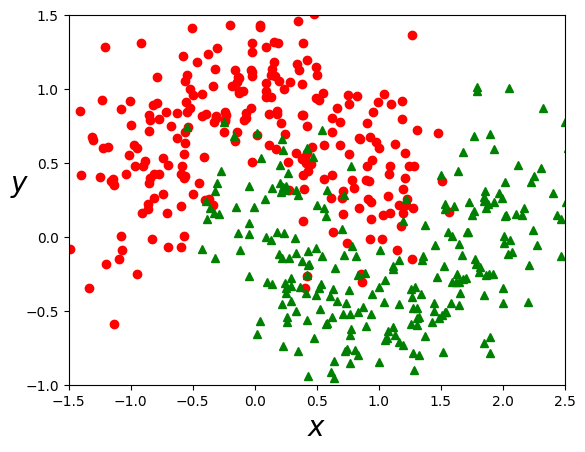

In [8]:
plt.Figure(figsize=(5, 3))
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
ada_clf = AdaBoostClassifier(
  estimator=tree_clf,
  n_estimators=200,
  learning_rate=0.5,
  random_state=42,
  algorithm="SAMME"
)

ada_clf.fit(x_train, y_train)
ada_clf.score(x_train, y_train), ada_clf.score(x_test, y_test)

(0.94, 0.89)

In [21]:
def plot_decision_boundary(clf, x, y, axes):
  x1s = np.linspace(axes[0], axes[1], 100)
  x2s = np.linspace(axes[2], axes[3], 100)
  x1, x2 = np.meshgrid(x1s, x2s)
  x_new = np.c_[x1.ravel(), x2.ravel()]
  y_pred = clf.predict(x_new).reshape(x1.shape)

  plt.contourf(x1, x2, y_pred, alpha=0.2)
  plt.contour(x1, x2, y_pred)

  plot_dataset(x, y, axes)

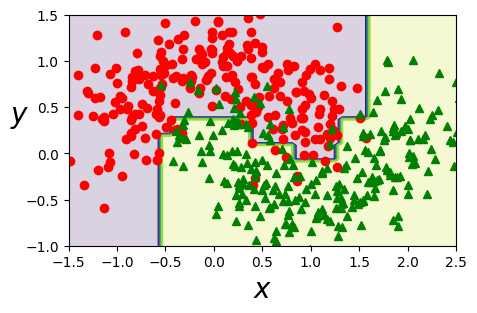

In [20]:
plt.figure(figsize=(5, 3))
plot_decision_boundary(ada_clf, x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

# AdaBoost Regression

In [22]:
np.random.seed(42)
m = 200
x = np.random.rand(m, 1)
y = 4 * (x[:, 0] - 0.5) ** 2 + np.random.randn(m) / 10

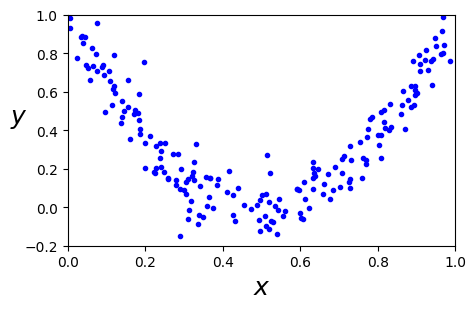

In [24]:
plt.figure(figsize=(5, 3))
plt.plot(x, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 1, -0.2, 1])
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
ada_reg = AdaBoostRegressor(
  estimator=tree_reg,
  n_estimators=200,
  learning_rate=0.5,
  random_state=42
)

ada_reg.fit(x_train, y_train)
ada_reg.score(x_train, y_train), ada_reg.score(x_test, y_test)

(0.9046936917800635, 0.8763593783888971)

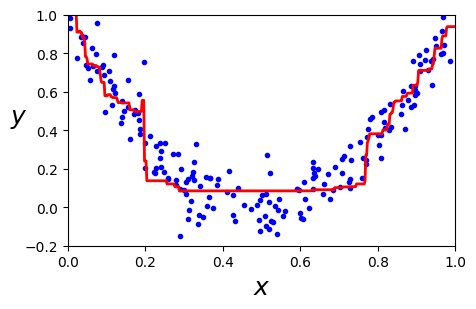

In [34]:
plt.figure(figsize=(5, 3))
plt.plot(x, y, "b.")
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred = ada_reg.predict(x1)
plt.plot(x1, y_pred, "r-", linewidth=2)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 1, -0.2, 1])
plt.show()